# What is Machine Learning?

Statistical learning is about using many tools to understand data. These tools can be grouped into two types: supervised and unsupervised. Supervised learning means you create a model to predict or estimate an outcome based on inputs. This kind of problem is found in many areas like business, medicine, space science, and government policies. Unsupervised learning means you don't have a specific outcome you're looking for, but you still try to find patterns or relationships in the data.

```{admonition} Best book on Machine Learning
My notes are based on this book reference.
https://www.statlearning.com/
```

## Simple Linear Regression

```{image} https://cdn.mathpix.com/snip/images/AWvQ3klUs21gxWHz6kmsBrUr8yzpr5VDeF6QePIYyZ4.original.fullsize.png
:align: center
:alt: Sample space
:width: 60%
```

Simple linear regression is a method used in statistics to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (independent variable), and the other is considered to be a dependent variable. The linear regression aims to draw a straight line that best fits the data by minimizing the sum of the squares of the vertical distances of the points from the line.

### Formula

$$
Y \approx \beta_0+\beta_1 X
$$

The equation of a simple linear regression line is:

where:
- y is the dependent variable,
- x is the independent variable,
- $\beta_0$ is the y-intercept of the regression line,
- $\beta_1$ is the slope of the regression line, which indicates the change in y for a one-unit change in x,
- $\epsilon$ is the error term (the difference between the observed values and the values predicted by the model).

The goal is to estimate the coefficients $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals (the differences between the observed values and the values predicted by the model).


For example, X may represent TV advertising and Y may represent sales.
Then we can regress sales onto TV by ftting the model

$$
\text { sales } \approx \beta_0+\beta_1 \times \mathrm{TV}
$$


$\beta_0$ and $\beta_1$ are two unknown constants that represent he intercept and slope terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters. Once we have used our raining data to produce estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ for the model coefficients, we can predict future sales on the basis of a particular value of TV advertising sy computing

$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1 x
$$

where $\hat{y}$ indicates a prediction of $Y$ on the basis of $X=x$. Here we use a hat symbol, ' , to denote the estimated value for an unknown parameter or coefficient, or to denote the predicted value of the response.

  
### Estimating the Coefcients

In practice, $\beta_0$ and $\beta_1$ are unknown. So before we can use to make predictions, we must use data to estimate the coefficients. Let
$$
\left(x_1, y_1\right),\left(x_2, y_2\right), \ldots,\left(x_n, y_n\right)
$$

represent $n$ observation pairs, each of which consists of a measurement of $X$ and a measurement of $Y$. In the Advertising example, this data set consists of the TV advertising budget and product sales in $n=200$ different markets. (Recall that the data are displayed in Figure 2.1.) Our goal is to obtain coefficient estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ such that the linear model (3.1) fits the available data well-that is, so that $y_i \approx \hat{\beta}_0+\hat{\beta}_1 x_i$ for $i=1, \ldots, n$. In other words, we want to find an intercept $\hat{\beta}_0$ and a slope $\hat{\beta}_1$ such that the resulting line is as close as possible to the $n=200$ data points. There are a number of ways of measuring closeness. However, by far the most common approach involves minimizing the least squares criterion, and we take that approach in this chapter. Alternative approaches will be considered in Chapter 6.

Let $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1 x_i$ be the prediction for $Y$ based on the $i$ th value of $X$. Then $e_i=y_i-\hat{y}_i$ represents the $i$ th residual - this is the difference between the $i$ th observed response value and the $i$ th response value that is predicted by our linear model. We define the residual sum of squares (RSS) as
$$
\mathrm{RSS}=e_1^2+e_2^2+\cdots+e_n^2
$$

### Example 1: Height and Weight

Imagine we have data on the heights and weights of a group of people. We could use simple linear regression to predict the weight of someone based on their height. In this example:
- The independent variable \(x\) would be height (e.g., in centimeters).
- The dependent variable \(y\) would be weight (e.g., in kilograms).
- By analyzing the data, we calculate the values of \(b_0\) (the intercept) and \(b_1\) (the slope).
- Suppose we find the regression equation to be \(y = 50 + 0.5x\). This means that for every additional centimeter in height, we expect the weight to increase by 0.5 kilograms, starting from 50 kilograms.

### Example 2: Hours spent studying vs. Exam score

First, we can visualize the data to understand its distribution and the relationship between 
x and y

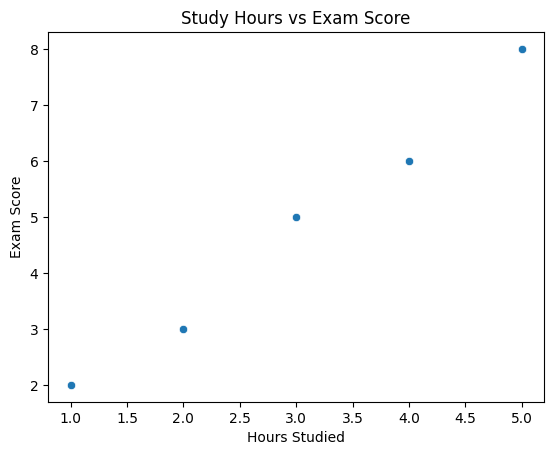

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data: Hours spent studying vs. Exam score
data = {
    'Hours_Studied': [1, 2, 3, 4, 5],
    'Exam_Score': [2, 3, 5, 6, 8]
}
df = pd.DataFrame(data)

# Plotting the data
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

Slope: 1.4999999999999998, Intercept: 0.3000000000000001


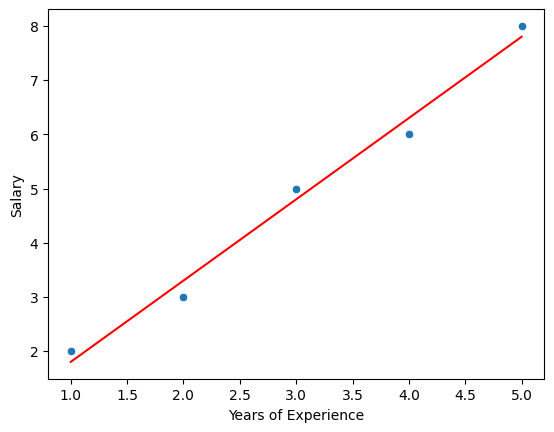

In [5]:
beta_1, beta_0 = np.polyfit(df.Hours_Studied, df.Exam_Score, 1)
# Print the computed parameters
print(f"Slope: {beta_1}, Intercept: {beta_0}")

regression_line = beta_0 + beta_1 * df.Hours_Studied

# Plot original data points
sns.scatterplot(x=df.Hours_Studied, y=df.Exam_Score)

# Plot regression line
plt.plot(df.Hours_Studied, regression_line, color='red')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Preparing the data
X = torch.tensor(df['Hours_Studied'].values, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(df['Exam_Score'].values, dtype=torch.float32).view(-1, 1)

# Defining the linear regression model
model = nn.Linear(in_features=1, out_features=1)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
epochs = 500
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Coefficients
print('Estimated coefficients:')
print('Weight:', model.weight.item())
print('Bias:', model.bias.item())


Epoch [100/500], Loss: 0.06318604946136475
Epoch [200/500], Loss: 0.06161843612790108
Epoch [300/500], Loss: 0.06082212179899216
Epoch [400/500], Loss: 0.06041758134961128
Epoch [500/500], Loss: 0.06021212413907051
Estimated coefficients:
Weight: 1.4905762672424316
Bias: 0.33402296900749207
